In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import quad
from astropy.constants import c
from astropy import units as u

# Loading the file

In [ ]:
file_path = "/content/drive/MyDrive/Colab Notebooks/Pantheon+SH0ES.dat"

# **Read the file**
* Using pandas try to read the data from a file.
* Now handling the error.
  1.  In "try" block attempt to read a whitespace-delimited {A "whitespace-delimited file" is a plain text file in which columns of data are separated by whitespace characters, such as: spaces ( ), tabs (\t) or sometimes newlines (\n) for separating rows} file (delim_whitespace=True). Treating lines starting with '#' as comments.
  2.  "Except" block catches the exception and assigns the error message as a string to 'df'.
* 'df.head()' displays the Dataframe. If 'df' is not a Dataframe the error message string will be shown.

In [ ]:
try:
  df = pd.read_csv(file_path, delim_whitespace=True, comment='#')
except Exception as e:
  df = str(e)

df.head() if isinstance(df, pd.DataFrame) else df

1. **zCMB**: The redshift of an object in the Cosmic Microwave Background (CMB) rest frame.
2. **zHD**: represents the redshift of the object as observed from the Sun's reference frame
3. **mm_b_corr**: This probably refers to the corrected apparent magnitude in the B-band (blue light). In astronomy, apparent magnitude is a measure of how bright an object appears from Earth. The "corr" suggests that this magnitude has been corrected for various factors, such as dust extinction or other observational biases, to get a more accurate measure of the object's intrinsic brightness.
4. **m_b_corr_err_DIAG**: This likely represents the diagonal error associated with the corrected apparent magnitude in the B-band. In data analysis, diagonal errors typically refer to the uncertainties in individual measurements, assuming no correlation between the errors of different measurements. This column would provide an estimate of the uncertainty in the m_b_corr value for each object.
5. **MU_SH0ES**: This most likely refers to the distance modulus calculated using the SH0ES (Supernova H0 for the Equation of State) analysis. The distance modulus is a measure of the distance to an astronomical object, related to the difference between its apparent magnitude (how bright it appears from Earth) and its absolute magnitude (how bright it intrinsically is). The SH0ES project is known for its precise measurements of the Hubble Constant ($H_0$$H_0$) using Type Ia supernovae, which involves calculating distance moduli.
6. **MU_SHOES_ERR_DIAG**: This would represent the diagonal error associated with the MU_SH0ES distance modulus. Similar to 'm_b_corr_err_DIAG', this indicates the uncertainty in the calculated distance modulus for each object, assuming no correlation between the errors of different measurements.

# **Extracting relevent columns**

In [ ]:
z= df['zHD'].values
mu = df['MU_SH0ES'].values
mu_err = df['MU_SH0ES_ERR_DIAG'].values

# **Ploting distance modulus vs redshift**
* Using **log scale** on the redshift along x- axis.
* including error bars.

In [ ]:
plt.figure(figsize=(8,6))
plt.errorbar(z, mu, yerr=mu_err, fmt='o', color='b', markersize=3, alpha=0.5)
plt.xscale('log')
plt.xlabel('Redshift (z)')
plt.ylabel('Distance Modulus (μ)')
plt.title('Hubble Diagram')
plt.grid(True, which="both", ls="--", lw=0.5)
plt.tight_layout()
plt.show()

Here's what it depicts:

1. The relationship between distance and redshift: The plot shows a clear trend: as redshift increases, the distance modulus also increases. Since distance modulus is directly related to distance, this means that more distant objects have higher redshifts.
2. Evidence for the expansion of the Universe: This observed relationship is a fundamental piece of evidence for the expansion of the Universe. The further away a galaxy or supernova is, the faster it is receding from us due to the expansion of space itself, resulting in a larger redshift.
3. Cosmological parameters: The shape of this curve is sensitive to the cosmological parameters that describe the Universe, such as the Hubble Constant ($H_0$), the matter density ($\Omega_m$), and the dark energy density ($\Omega_\Lambda$). By fitting theoretical models to this data, cosmologists can constrain these parameters.
4. Supernovae as standard candles: The data points in this plot come from Type Ia supernovae, which are used as "standard candles". This means they have a known intrinsic brightness, allowing astronomers to calculate their distance modulus (and thus distance) from their observed apparent brightness. The scatter in the data points reflects the uncertainties in these measurements, which are represented by the error bars.

# **Definig ΛCDM model**
* The dimensionless Hubble parameter:
  $$
  E(z) = \sqrt{\Omega_m (1+z)^3 + (1 - \Omega_m)}
  $$

- The distance modulus is:
  $$
  \mu(z) = 5 \log_{10}(d_L / \text{Mpc}) + 25
  $$

- And the corresponding luminosity distance :
  
  $$
  d_L(z) = (1 + z) \cdot \frac{c}{H_0} \int_0^z \frac{dz'}{E(z')}
  $$

In [2]:
def E(z, omega_m):
    return np.sqrt(omega_m * (1 + z)**3 + (1 - omega_m))

def luminosity_distance(z, omega_m, H0):
    C = c.to('km/s')
    integrand = lambda z_prime: 1 / E(z_prime, omega_m)
    integral = np.array([quad(integrand, 0, zi)[0] for zi in z])
    return (C.value / H0) * (1 + z) * integral

def mu_theory(z, omega_m, H0):
    d_l = luminosity_distance(z, omega_m, H0)
    return 5 * np.log10(d_l) + 25


#  Fit the Model to Supernova Data

In [7]:
H0 = 70
Omega_m = 0.3
p0 = [H0, Omega_m]
popt, pcov = curve_fit(mu_theory, z, mu, sigma=mu_err, p0=p0, absolute_sigma=True)
Omega_m_fit, H0_fit = popt
Omega_m_err, H0_err = np.sqrt(np.diag(pcov))

print(f"Fitted H0 = {H0_fit:.2f} ± {H0_err:.2f} km/s/Mpc")
print(f"Fitted Omega_m = {Omega_m_fit:.3f} ± {Omega_m_err:.3f}")

/tmp/ipython-input-6-3556122648.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(omega_m * (1 + z)**3 + (1 - omega_m))
/tmp/ipython-input-6-3556122648.py:7: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral = np.array([quad(integrand, 0, zi)[0] for zi in z])
/tmp/ipython-input-6-3556122648.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(omega_m * (1 + z)**3 + (1 - omega_m))
/tmp/ipython-input-6-3556122648.py:7: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral = np.array([quad(integrand, 0, zi)[0] for zi in z])
/tmp/ipython-input-6-3556122648.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(omega_m * (1 + z)**3 + (1 - omega_m))
/tmp/ipython-input-6-3556122648.py:7:

Fitted H0 = 72.97 ± 0.26 km/s/Mpc
Fitted Omega_m = 0.351 ± 0.019


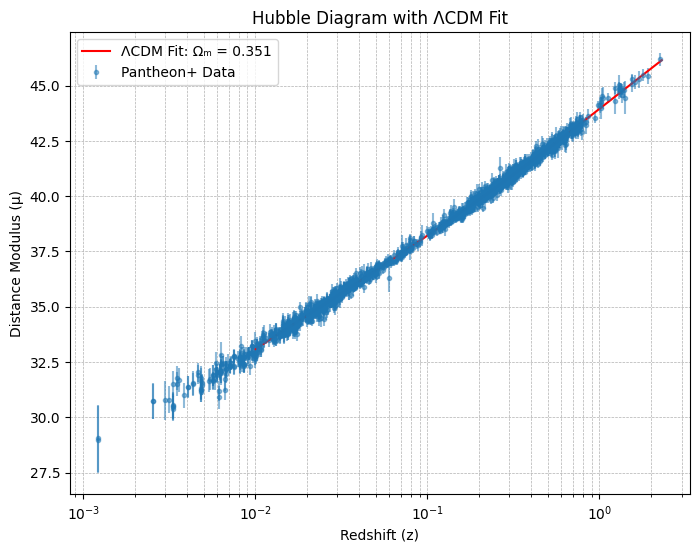

In [8]:
omega_m_fit=popt[0]
z_plot = np.linspace(0.01, 2.3, 300)
mu_model = mu_theory(z_plot, omega_m_fit, H0_fit)

plt.figure(figsize=(8, 6))
plt.errorbar(z, mu, yerr=mu_err, fmt='o', markersize=3, alpha=0.5, label='Pantheon+ Data')
plt.plot(z_plot, mu_model, 'r-', label=f'ΛCDM Fit: Ωₘ = {omega_m_fit:.3f}')
plt.xscale('log')
plt.xlabel("Redshift (z)")
plt.ylabel("Distance Modulus (μ)")
plt.title("Hubble Diagram with ΛCDM Fit")
plt.legend()
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()


## ⏳ Estimate the Age of the Universe

Now that we have the best-fit values of $ H_0 $ and $ \Omega_m $, we can estimate the age of the universe. This is done by integrating the inverse of the Hubble parameter over redshift:

$$
t_0 = \int_0^\infty \frac{1}{(1 + z) H(z)} \, dz
$$

We convert $ H_0 $ to SI units and express the result in gigayears (Gyr). This provides an independent check on our cosmological model by comparing the estimated age to values from other probes like Planck CMB measurements.


In [9]:
# def H_z(z, H0, omega_m):
#   return H0 * E(z, omega_m)

def age_of_universe(H0, Omega_m):
    # Convert H0 from km/s/Mpc to 1/s
    H0_SI = (H0 * u.km / u.s / u.Mpc).to(1 / u.s).value

    # Integrate from z = 0 to ∞
    integrand = lambda z: 1 / ((1 + z) * H0_SI * E(z, Omega_m))
    integral, _ = quad(integrand, 0, np.inf)

    # Convert result from seconds to Gyr
    t0_seconds = integral
    t0_Gyr = (t0_seconds * u.s).to(u.Gyr).value
    return t0_Gyr

In [10]:
t0 = age_of_universe(H0_fit, Omega_m_fit)
print(f"Estimated age of Universe: {t0:.2f} Gyr")

Estimated age of Universe: 12.36 Gyr


## 📊 Analyze Residuals

To evaluate how well our cosmological model fits the data, we compute the residuals:

$$
\text{Residual} = \mu_{\text{obs}} - \mu_{\text{model}}
$$

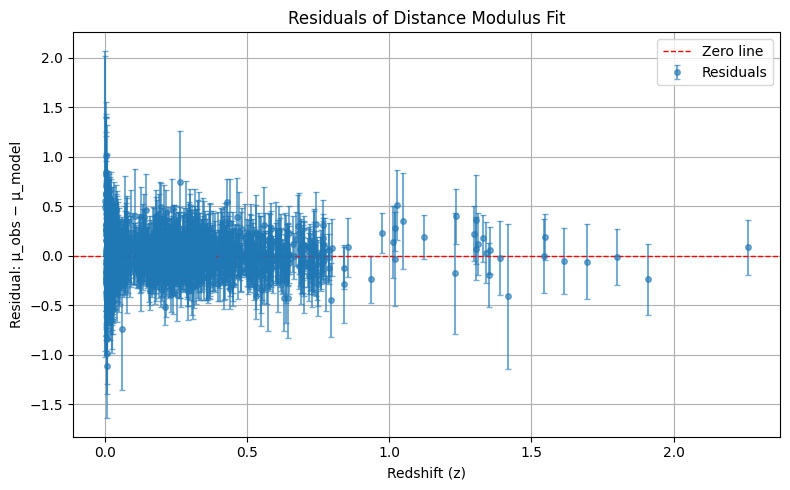

In [11]:
mu_model = mu_theory(z, Omega_m_fit, H0_fit)

residual = mu - mu_model

plt.figure(figsize=(8, 5))
plt.errorbar(z, residual, yerr=mu_err, fmt='o', markersize=4, capsize=2, alpha=0.6, label="Residuals")
plt.axhline(0, color='r', linestyle='--', linewidth=1, label="Zero line")
plt.xlabel("Redshift (z)")
plt.ylabel("Residual: μ_obs − μ_model")
plt.title("Residuals of Distance Modulus Fit")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 🔧 Fit with Fixed Matter Density

To reduce parameter degeneracy, let's fix $ \Omega_m = 0.3 $ and fit only for the Hubble constant $ H_0 $.


In [18]:
def mu_fixed_Om(z, H0):
    return mu_theory(z, 0.3, H0)

In [19]:
# Fit only H0, keeping Omega_m fixed at 0.3
params, cov = curve_fit(mu_fixed_Om, z, mu, sigma=mu_err, p0=[H0], absolute_sigma=True)

# Extract fit and error
H0_fit_only, = params
H0_err_only = np.sqrt(np.diag(cov))[0]

print(f"Fitted H0 (Ωm=0.3 fixed): {H0_fit_only:.2f} ± {H0_err_only:.2f} km/s/Mpc")


Fitted H0 (Ωm=0.3 fixed): 73.53 ± 0.17 km/s/Mpc


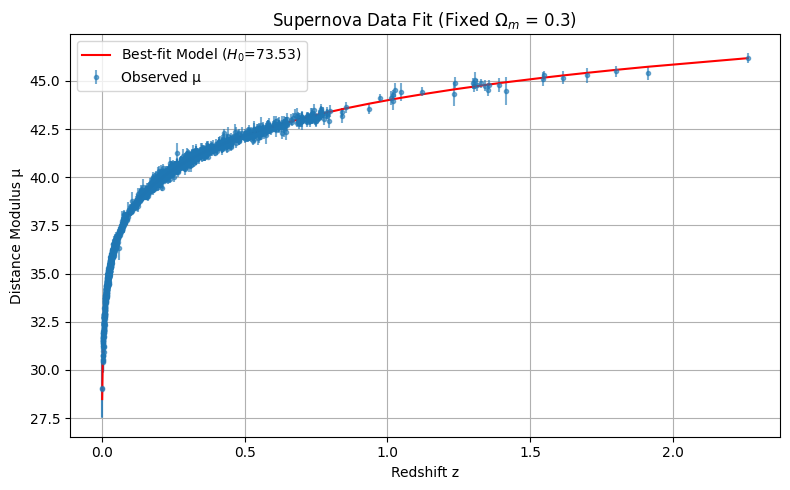

In [20]:
mu_model_fixed = mu_fixed_Om(z, H0_fit_only)

plt.figure(figsize=(8, 5))
plt.errorbar(z, mu, yerr=mu_err, fmt='o', label='Observed μ', markersize=3, alpha=0.6)
plt.plot(z, mu_model_fixed, 'r-', label=f'Best-fit Model ($H_0$={H0_fit_only:.2f})')
plt.xlabel("Redshift z")
plt.ylabel("Distance Modulus μ")
plt.title("Supernova Data Fit (Fixed $\\Omega_m$ = 0.3)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

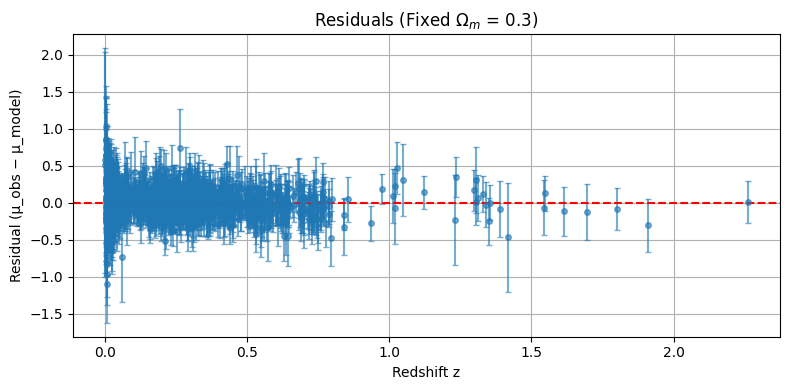

In [21]:
residuals_fixed = mu - mu_model_fixed

plt.figure(figsize=(8, 4))
plt.errorbar(z, residuals_fixed, yerr=mu_err, fmt='o', markersize=4, capsize=2, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Redshift z")
plt.ylabel("Residual (μ_obs − μ_model)")
plt.title("Residuals (Fixed $\\Omega_m$ = 0.3)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
t0_fixed = age_of_universe(H0_fit_only, 0.3)
print(f"Estimated age of the Universe (Ωm=0.3): {t0_fixed:.2f} Gyr")

Estimated age of the Universe (Ωm=0.3): 12.82 Gyr


## 🔍 Compare Low-z and High-z Subsamples

Finally, we examine whether the inferred value of $H_0$ changes with redshift by splitting the dataset into:
- **Low-z** supernovae ($ z < 0.1 $)
- **High-z** supernovae ($ z \geq 0.1 $)

We then fit each subset separately (keeping $ \Omega_m = 0.3 $) to explore any potential tension or trend with redshift.


In [23]:
z_split = 0.1

# Create boolean masks
low_z_mask = z < z_split
high_z_mask = z >= z_split

# Split data
z_low, mu_low, sigma_low = z[low_z_mask], mu[low_z_mask], mu_err[low_z_mask]
z_high, mu_high, sigma_high = z[high_z_mask], mu[high_z_mask], mu_err[high_z_mask]


In [24]:
# Low-z fit
H0_low, cov_low = curve_fit(mu_fixed_Om, z_low, mu_low, sigma=sigma_low, p0=[H0], absolute_sigma=True)

# High-z fit
H0_high, cov_high = curve_fit(mu_fixed_Om, z_high, mu_high, sigma=sigma_high, p0=[H0], absolute_sigma=True)

# Extract errors
H0_low_err = np.sqrt(np.diag(cov_low))[0]
H0_high_err = np.sqrt(np.diag(cov_high))[0]

In [25]:
print(f"Low-z (z < {z_split}): H₀ = {H0_low[0]:.2f} ± {H0_low_err:.2f} km/s/Mpc")
print(f"High-z (z ≥ {z_split}): H₀ = {H0_high[0]:.2f} ± {H0_high_err:.2f} km/s/Mpc")

Low-z (z < 0.1): H₀ = 73.01 ± 0.28 km/s/Mpc
High-z (z ≥ 0.1): H₀ = 73.85 ± 0.22 km/s/Mpc
